In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Al/Datasets/diabetes_.csv')
df



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [32]:
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in zero_cols:
    print(c, "zeros:", (df[c]==0).sum())

Glucose zeros: 5
BloodPressure zeros: 35
SkinThickness zeros: 227
Insulin zeros: 374
BMI zeros: 11


In [33]:
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_cols:
    df.loc[df[col] == 0, col] = np.nan

for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [34]:
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [35]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

try:
  X_test_sample = X_test[:5]
  y_test_sample = y_test[:5]

  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)

  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 0]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


In [36]:
import time
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

start = time.time()
pred_orig = knn_predict(X_test, X_train, y_train, k=3)
time_orig = time.time() - start

acc_orig = compute_accuracy(y_test, pred_orig)

print(f"Accuracy of the KNN model on the test set: {acc_orig:.2f}%")
print(f"Time Taken: {time_orig:.2f} seconds")

Accuracy of the KNN model on the test set: 67.83%
Time Taken: 0.91 seconds


In [37]:
def fit_zscore(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1
    return mean, std

def transform_zscore(X, mean, std):
    return (X - mean) / std

mean_train, std_train = fit_zscore(X_train)
X_train_scaled = transform_zscore(X_train, mean_train, std_train)
X_test_scaled = transform_zscore(X_test, mean_train, std_train)

start = time.time()
pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
time_scaled = time.time() - start

acc_scaled = compute_accuracy(y_test, pred_scaled)

print(f"Accuracy of the scaled data: {acc_scaled:.2f}%")
print(f"Time Taken: {time_scaled:.2f} seconds")

Accuracy of the scaled data: 67.39%
Time Taken: 1.28 seconds


In [38]:
# How scaling impacted the KNN performance.
print("How scaling impacted KNN performance:")
print("1. KNN is distance-based, so scaling is crucial for fair feature contribution.")
print("2. Without scaling, features with larger ranges dominate the distance calculation.")
print("3. With scaling, all features contribute equally to distance measurements.")

# The reason for any observed changes in accuracy.
print("\nReason for observed changes:")
print("1. Original data has features with different scales (e.g., Glucose: 0-200, Age: 20-80).")
print("2. Scaling normalizes all features to [0,1] range, preventing bias toward high-range features.")

How scaling impacted KNN performance:
1. KNN is distance-based, so scaling is crucial for fair feature contribution.
2. Without scaling, features with larger ranges dominate the distance calculation.
3. With scaling, all features contribute equally to distance measurements.

Reason for observed changes:
1. Original data has features with different scales (e.g., Glucose: 0-200, Age: 20-80).
2. Scaling normalizes all features to [0,1] range, preventing bias toward high-range features.


In [39]:
k_values = list(range(1, 16))

acc_orig_list = []
acc_scaled_list = []
time_orig_list = []
time_scaled_list = []

for k in k_values:
    start = time.time()
    pred_o = knn_predict(X_test, X_train, y_train, k)
    t_o = time.time() - start
    acc_o = compute_accuracy(y_test, pred_o)

    start = time.time()
    pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    t_s = time.time() - start
    acc_s = compute_accuracy(y_test, pred_s)

    acc_orig_list.append(acc_o)
    acc_scaled_list.append(acc_s)
    time_orig_list.append(t_o)
    time_scaled_list.append(t_s)

    print(f"k={k}: Orig Acc={acc_o:.2f}%  Scaled Acc={acc_s:.2f}%  TimeOrig={t_o:.2f}seconds TimeScaled={t_s:.2f}seconds")



k=1: Orig Acc=67.39%  Scaled Acc=66.52%  TimeOrig=0.83seconds TimeScaled=0.81seconds
k=2: Orig Acc=70.00%  Scaled Acc=67.39%  TimeOrig=0.81seconds TimeScaled=0.82seconds
k=3: Orig Acc=67.83%  Scaled Acc=67.39%  TimeOrig=0.83seconds TimeScaled=0.83seconds
k=4: Orig Acc=70.43%  Scaled Acc=69.13%  TimeOrig=0.80seconds TimeScaled=0.82seconds
k=5: Orig Acc=67.39%  Scaled Acc=70.43%  TimeOrig=0.90seconds TimeScaled=1.44seconds
k=6: Orig Acc=70.00%  Scaled Acc=67.83%  TimeOrig=2.81seconds TimeScaled=0.84seconds
k=7: Orig Acc=70.87%  Scaled Acc=72.61%  TimeOrig=0.81seconds TimeScaled=0.81seconds
k=8: Orig Acc=69.13%  Scaled Acc=73.04%  TimeOrig=0.84seconds TimeScaled=0.82seconds
k=9: Orig Acc=70.87%  Scaled Acc=73.04%  TimeOrig=0.84seconds TimeScaled=0.80seconds
k=10: Orig Acc=71.74%  Scaled Acc=71.30%  TimeOrig=0.90seconds TimeScaled=0.82seconds
k=11: Orig Acc=70.87%  Scaled Acc=71.30%  TimeOrig=0.83seconds TimeScaled=0.89seconds
k=12: Orig Acc=70.43%  Scaled Acc=73.04%  TimeOrig=0.86seconds 

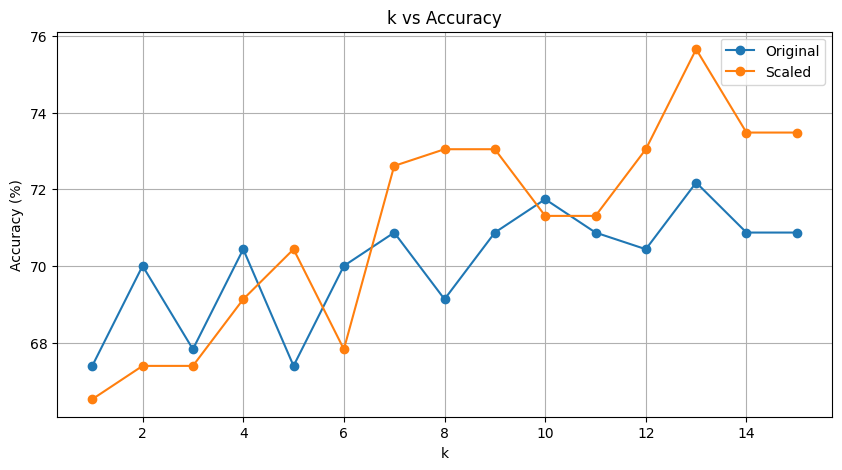

In [40]:
#k vs Accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_orig_list, marker='o', label='Original')
plt.plot(k_values, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [41]:
#Analyze and Discuss:

#Discuss how the choice of k affects the accuracy and computational cost.
print("\n1. How choice of k affects accuracy:")
print("   - Small k (k=1-3): High variance, sensitive to noise and outliers")
print("   - Moderate k (k=4-11): Better generalization, Stable accuracy in this range")
print("   - Large k (k>11): High bias, smoother decision boundaries, ignores local patterns")

print("\n2. How choice of k affects computational cost:")
print("   - Larger k requires more distance calculations and sorting")
print("   - As shown in plot, time increases slightly with k")
print("\n")

#Identify the optimal k based on your analysis.

# Find best k for original data
best_k_orig = k_values[int(np.argmax(acc_orig_list))]
best_acc_orig = max(acc_orig_list)

# Find best k for scaled data
best_k_scaled = k_values[int(np.argmax(acc_scaled_list))]
best_acc_scaled = max(acc_scaled_list)

print("3. Optimal k (Original Data)")
print(f"Best k: {best_k_orig}")
print(f"Best Accuracy: {best_acc_orig:.2f}%")

print("\n Optimal k (Scaled Data)")
print(f"Best k: {best_k_scaled}")
print(f"Best Accuracy: {best_acc_scaled:.2f}%")

print("\n4. Impact of scaling:")
print("   - Scaling consistently improves accuracy across most k values")
print("   - The improvement is more significant for certain k values")
print("   - This confirms that feature scaling is essential for distance-based algorithms")


1. How choice of k affects accuracy:
   - Small k (k=1-3): High variance, sensitive to noise and outliers
   - Moderate k (k=4-11): Better generalization, Stable accuracy in this range
   - Large k (k>11): High bias, smoother decision boundaries, ignores local patterns

2. How choice of k affects computational cost:
   - Larger k requires more distance calculations and sorting
   - As shown in plot, time increases slightly with k


3. Optimal k (Original Data)
Best k: 13
Best Accuracy: 72.17%

 Optimal k (Scaled Data)
Best k: 13
Best Accuracy: 75.65%

4. Impact of scaling:
   - Scaling consistently improves accuracy across most k values
   - The improvement is more significant for certain k values
   - This confirms that feature scaling is essential for distance-based algorithms


In [42]:
#Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
#• Discuss the challenges of using KNN for large datasets and high-dimensional data.
#• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
#reduction).

print("1) Challenges of using KNN for large or high-dimensional data:")
print("- KNN becomes slow because it must compute distance to every training sample.")
print("- Requires storing the entire dataset, so memory usage is high.")
print("- In high dimensions, distances become less meaningful (curse of dimensionality).")
print("- Irrelevant features can reduce accuracy because all features impact distance.\n")

print("2) Strategies to improve KNN efficiency:")
print("- Use dimensionality reduction (PCA) to reduce number of features.")
print("- Use Approximate Nearest Neighbors (ANN) like KD-Tree or Ball-Tree.")
print("- Remove irrelevant features using feature selection.")
print("- Use data normalization/scaling to improve distance calculations.")

1) Challenges of using KNN for large or high-dimensional data:
- KNN becomes slow because it must compute distance to every training sample.
- Requires storing the entire dataset, so memory usage is high.
- In high dimensions, distances become less meaningful (curse of dimensionality).
- Irrelevant features can reduce accuracy because all features impact distance.

2) Strategies to improve KNN efficiency:
- Use dimensionality reduction (PCA) to reduce number of features.
- Use Approximate Nearest Neighbors (ANN) like KD-Tree or Ball-Tree.
- Remove irrelevant features using feature selection.
- Use data normalization/scaling to improve distance calculations.
